## LIBs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report , confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## FUNs

In [2]:
def check_shape(x_train,y_train,x_test,y_test):
    print('x_train shape: ',x_train.shape)
    print('y_train shape: ',y_train.shape)
    print('--'*20)
    print('x_test shape: ',x_test.shape)
    print('y_test shape: ',y_test.shape)

In [ ]:
def train_model(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    
    print('Classification Report for Test Data')
    print('--'*20)
    print(classification_report(y_test,test_pred))
    print('=='*25)
    print('Classification Report for Train Data')
    print('--'*20)
    print(classification_report(y_train,train_pred))
    
    cm_train  = confusion_matrix(y_train,train_pred)
    cm_test  = confusion_matrix(y_test,test_pred)

    return cm_train,cm_test

## DATA

In [3]:
df = pd.read_csv(r"D:\Work\Route\C07\ONline\New folder\New folder\mushroom.csv")

In [4]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [6]:
df.duplicated().sum()

303

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000
mean,568.629178,4.005900,2.142857,7.344599,0.752102,1057.000633,8.454013,0.952322,0.546639
std,360.384461,2.165188,2.232546,3.190447,0.645987,780.263033,3.235507,0.303795,0.497825
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,290.000000,2.000000,0.000000,5.000000,0.270146,430.000000,6.000000,0.888450,0.000000
50%,528.000000,5.000000,1.000000,8.000000,0.589316,929.000000,11.000000,0.943195,1.000000
75%,782.000000,6.000000,4.000000,10.000000,1.046900,1527.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [10]:
df['class'].value_counts()

class
1    29372
0    24360
Name: count, dtype: int64

In [11]:
x = df.drop(['class'],axis = 1)
y = df['class']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [13]:
check_shape(x_train,x_test,y_train,y_test)

x_train shape:  (37612, 8)
y_train shape:  (16120, 8)
----------------------------------------
x_test shape:  (37612,)
y_test shape:  (16120,)


## LR

In [15]:
lr = LogisticRegression()

In [30]:
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
lr_pred_test = lr.predict(x_test)
lr_pred_train = lr.predict(x_train)

In [34]:
print(classification_report(y_test,lr_pred_test))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57      7277
           1       0.65      0.71      0.68      8843

    accuracy                           0.63     16120
   macro avg       0.63      0.62      0.62     16120
weighted avg       0.63      0.63      0.63     16120



In [36]:
print(classification_report(y_train,lr_pred_train))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57     17083
           1       0.65      0.71      0.68     20529

    accuracy                           0.63     37612
   macro avg       0.63      0.62      0.62     37612
weighted avg       0.63      0.63      0.63     37612



In [38]:
cm = confusion_matrix(y_test,lr_pred_test)

In [40]:
cm

array([[3917, 3360],
       [2569, 6274]], dtype=int64)

<Axes: >

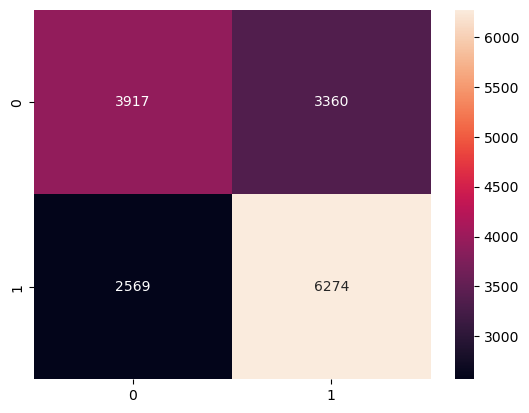

In [42]:
sns.heatmap(cm,annot = True, fmt='d')

## ALL Models

In [48]:
lr_model = LogisticRegression()
svm_model = SVC()
knn_model = KNeighborsClassifier()

In [64]:
cm_train,cm_test = train_model(lr_model,x_train,y_train,x_test,y_test)

Classification Report for Test Data
----------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.54      0.57      7277
           1       0.65      0.71      0.68      8843

    accuracy                           0.63     16120
   macro avg       0.63      0.62      0.62     16120
weighted avg       0.63      0.63      0.63     16120

Classification Report for Train Data
----------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.54      0.57     17083
           1       0.65      0.71      0.68     20529

    accuracy                           0.63     37612
   macro avg       0.63      0.62      0.62     37612
weighted avg       0.63      0.63      0.63     37612



In [ ]:
train_model(svm_model,x_train,y_train,x_test,y_test)

In [56]:
cm_train,cm_test = train_model(knn_model,x_train,y_train,x_test,y_test)

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      7277
           1       0.74      0.73      0.74      8843

    accuracy                           0.71     16120
   macro avg       0.71      0.71      0.71     16120
weighted avg       0.71      0.71      0.71     16120

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     17083
           1       0.83      0.82      0.83     20529

    accuracy                           0.81     37612
   macro avg       0.81      0.81      0.81     37612
weighted avg       0.81      0.81      0.81     37612

